# PCA - Classification - Decision Tree - Major_Occupation

Now we try a Decision Tree Classifier from sklearn on the same Internat Usage Major_Occupation data. The same interface is used as the k-nearest-networks classifier.

Again, we separate the data into training and test data.

In [1]:
# Import feature subset with Major_Occupation Column and one hot encoded values

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

originalDF = pd.read_csv('occupationFeatureSubset.csv')

# Next we check the Major_Occupation options in the dataset for use with classification
print(originalDF.Major_Occupation.unique())

# Now we replace those values with integers for use with the classification algorithm
occupation_values = {"Major_Occupation": {"Professional": 1, "Education": 2, "Computer": 3, "Other": 4, "Management": 5}}
originalDF.replace(occupation_values, inplace=True)

featureDF = originalDF[originalDF.columns.difference(['Major_Occupation'])]

['Professional' 'Education' 'Computer' 'Other' 'Management']


## PCA Transformation

In [2]:
from sklearn import preprocessing
X, y = featureDF, originalDF['Major_Occupation']

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

# Now we should split our data into a training set and a test set in order to properly assess our model using PCA
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [3]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(Xtrain)

Xtrain = pca_model.transform(Xtrain)
Xtest = pca_model.transform(Xtest)

# 2-Dimensions
Xtrain[:5]

array([[-0.45453297, -0.33385824],
       [-0.2606989 ,  0.10065705],
       [-0.41473897,  0.1155537 ],
       [-0.40843431,  0.12486152],
       [ 0.53108298, -0.38371677]])

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

criterion = "entropy"
treeDepth = 8
tree = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)
tree.fit(Xtrain, ytrain)
y_treeTest = tree.predict(Xtest)
print(accuracy_score(ytest, y_treeTest))
print(confusion_matrix(ytest, y_treeTest))
print(classification_report(ytest, y_treeTest, digits=3))

0.3466561139691334
[[125 141 149 141   9]
 [ 64 308 110  81   9]
 [101 179 186  52   7]
 [114  94 100 250  16]
 [ 64  62  87  71   7]]
              precision    recall  f1-score   support

           1      0.267     0.221     0.242       565
           2      0.393     0.538     0.454       572
           3      0.294     0.354     0.322       525
           4      0.420     0.436     0.428       574
           5      0.146     0.024     0.041       291

   micro avg      0.347     0.347     0.347      2527
   macro avg      0.304     0.315     0.297      2527
weighted avg      0.322     0.347     0.326      2527



dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.708491 to fit



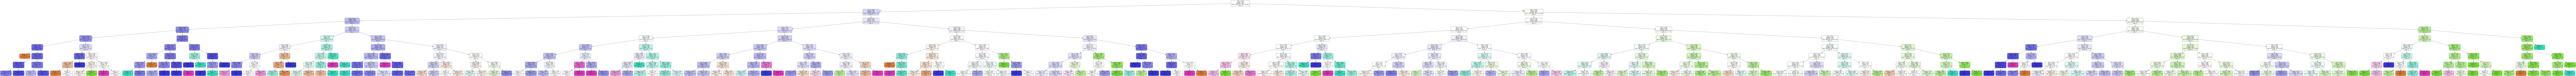

True

In [9]:
from IPython.display import Image
from IPython.display import display
import pydotplus
from sklearn.tree import export_graphviz
        
dot_data = export_graphviz(
    tree, 
    out_file=None,
    #feature_names=predNames,  
    # the parameters below are new in sklearn 0.18
    class_names=['1', '2', '3', '4', '5'],  
    filled=True,
    rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))
graph.write_pdf("decisionTree/majoroccupation/pca/occupation-tree.pdf")